# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

In [233]:
import pandas as pd
import seaborn as sns
import numpy as np


### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [225]:
df_iris = pd.read_csv("iris.csv")

In [232]:
df_iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,109,6.7,2.5,5.8,1.8,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
1,2,4.9,3.0,1.4,0.2,Iris-setosa
144,145,6.7,3.3,5.7,2.5,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [237]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [235]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [244]:
df_iris.fillna(df_iris.median,inplace = True)


In [245]:
df_iris.isnull().sum()  ##checking after replacing with median.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [260]:
from sklearn.preprocessing import LabelEncoder as LE
df_iris_y = [0,1,2]
df_iris_transformed= LE.fit_transform(df_iris['Species'])
df_iris_transformed

TypeError: fit_transform() missing 1 required positional argument: 'y'

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [246]:
df_iris.corr()

,Id
Id,1.0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [133]:
BC_df = pd.read_csv("bc2.csv")
BC_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [134]:
print("Number of Rows/records", BC_df.shape[0], "And Number of Columns:" , BC_df.shape[1])

Number of Rows/records 699 And Number of Columns: 11


In [135]:
BC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [73]:
BC_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [25]:
BC_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [69]:
BC_Test = BC_df

In [ ]:
BC_Test.fillna()

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [137]:
#Unknown_Count = BC_df.isna().sum()
#Null_Count = BC_df.isnull().sum()
#print(Unknown_Count)
#print(Null_Count)
BC_df['Bare Nuclei'].value_counts()['?']

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [68]:
BC_df.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [141]:
Top = BC_df['Bare Nuclei'].describe().top
BC_df['Bare Nuclei'] = BC_df['Bare Nuclei'].replace('?',Top)


### Question 5
#### Find the distribution of target variable (Class) 

In [93]:
BC_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

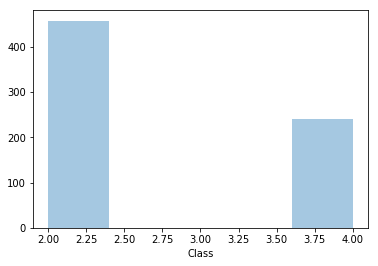

In [100]:
import seaborn as sns
sns.distplot(BC_df['Class'],hist=True,kde = False)

#### Convert the datatype of Bare Nuclei to `int`

In [142]:
BC_df['Bare Nuclei'] = BC_df['Bare Nuclei'].astype(int)

In [143]:
BC_df['Bare Nuclei'].dtype

dtype('int32')

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

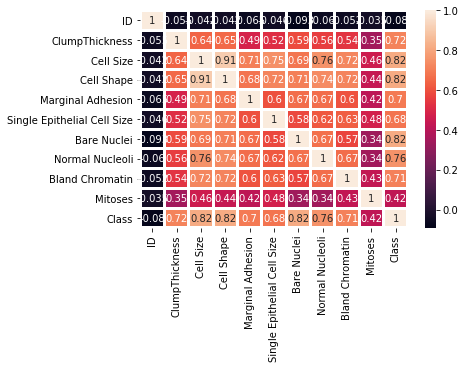

In [180]:
#pd.plotting.scatter_matrix(BC_df,alpha=0.05)
sns.heatmap(BC_df.corr(),linewidths=2.0,annot=True)

In [181]:
BC_df1 = BC_df.drop('Cell Shape',axis = 1)

In [182]:
BC_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [261]:
X=BC_df1.drop('Class',axis=1)
y=BC_df1['Class']

In [258]:
print(X)

          ID  ClumpThickness  Cell Size  Marginal Adhesion  \
0    1000025               5          1                  1   
1    1002945               5          4                  5   
2    1015425               3          1                  1   
3    1016277               6          8                  1   
4    1017023               4          1                  3   
5    1017122               8         10                  8   
6    1018099               1          1                  1   
7    1018561               2          1                  1   
8    1033078               2          1                  1   
9    1033078               4          2                  1   
10   1035283               1          1                  1   
11   1036172               2          1                  1   
12   1041801               5          3                  3   
13   1043999               1          1                  1   
14   1044572               8          7                 10   
15   104

In [262]:
print(y)

0      2
1      2
2      2
3      2
4      2
5      4
6      2
7      2
8      2
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     4
19     2
20     4
21     4
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
669    4
670    4
671    2
672    2
673    2
674    2
675    2
676    2
677    2
678    2
679    2
680    4
681    4
682    2
683    2
684    2
685    2
686    2
687    2
688    2
689    2
690    2
691    4
692    2
693    2
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


#### Divide the Training and Test sets in 70:30 

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=3)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(489, 9) (489,)
(210, 9) (210,)


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [187]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
stdX_train = sc.fit_transform(X_train)
stdX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(stdX_train,y_train)
predicted = knn.predict(stdX_test)
print(accuracy_score(y_test,predicted))



0.9666666666666667


In [189]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(stdX_train,y_train)
predicted = knn.predict(stdX_test)
print(accuracy_score(y_test,predicted))

0.9571428571428572


In [190]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(stdX_train,y_train)
predicted = knn.predict(stdX_test)
print(accuracy_score(y_test,predicted))

0.9571428571428572


In [263]:
for i,k in enumerate([3,5,9]):
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        stdX_train = sc.fit_transform(X_train)
        stdX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(stdX_train,y_train)
        predicted = knn.predict(stdX_test)
        print("K Value=",k,"Random State = ",j, "Accurracy Score", accuracy_score(y_test,predicted))
        

K Value= 3 Random State =  0 Accurracy Score 0.9571428571428572
K Value= 3 Random State =  1 Accurracy Score 0.9619047619047619
K Value= 3 Random State =  2 Accurracy Score 0.9476190476190476
K Value= 3 Random State =  3 Accurracy Score 0.9666666666666667
K Value= 3 Random State =  4 Accurracy Score 0.9714285714285714
K Value= 3 Random State =  5 Accurracy Score 0.9428571428571428
K Value= 3 Random State =  6 Accurracy Score 0.9476190476190476
K Value= 3 Random State =  7 Accurracy Score 0.9571428571428572
K Value= 3 Random State =  8 Accurracy Score 0.9523809523809523
K Value= 3 Random State =  9 Accurracy Score 0.9714285714285714
K Value= 3 Random State =  10 Accurracy Score 0.9619047619047619
K Value= 3 Random State =  11 Accurracy Score 0.9619047619047619
K Value= 3 Random State =  12 Accurracy Score 0.9714285714285714
K Value= 3 Random State =  13 Accurracy Score 0.9714285714285714
K Value= 3 Random State =  14 Accurracy Score 0.9714285714285714
K Value= 3 Random State =  15 Accur

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [207]:
k_neigh = np.arange(1,20,2)
print(k_neigh)
train_accuracy_plot = np.empty(len(k_neigh))
test_accuracy_plot = np.empty(len(k_neigh))
for i,k in enumerate(k_neigh):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        stdX_train = sc.fit_transform(X_train)
        stdX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(stdX_train,y_train)
        train.append(knn.score(stdX_train,y_train))
        test.append(knn.score(stdX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
        

[ 1  3  5  7  9 11 13 15 17 19]


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.


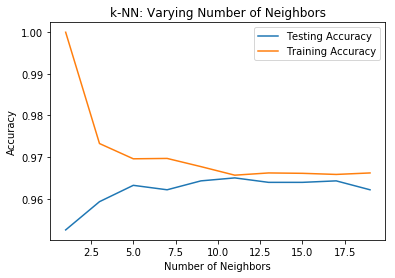

In [208]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(k_neigh, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(k_neigh, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy seems to be approximately high at k = 5 or 11